# Capstone Final Assignment

As a business and tourist hub, the city is famous for its cuisine as well. From street food to high end Michelin star restaurants, you will find everything in New York City. Various well-known chefs have their restaurants there. Eat this, not that placed New York City as one of the top cities for food.

In 2015, NYC started building public WIFI hubs in locations where pay phones used to exist.  There are plans to have over 7500 WIFI hotspots installed.  Hotspots are to have up to 1GBps speed internet.

The objective is to locate and determine if a restaurant’s proximity to a public WIFI hotspot has influence on the rating of that restaurant.  The target audience interested in this problem is a group of small business owners who are interested in opening a restaurant in Manhattan.


### Import Libraries and packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import urllib.request
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
# import folium


from bs4 import BeautifulSoup
import requests
print('Libraries imported.')

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

### Import NY Wifi Data

In [ ]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

In [ ]:
# The code was removed by Watson Studio for sharing.

In [ ]:
# The code was removed by Watson Studio for sharing.

### Create a Pandas Dataframe with the NY WiFi Data

In [ ]:
ny_wifi = df_data_0.copy()

In [ ]:
ny_wifi['NTAName'].value_counts()

In [ ]:
ny_wifi['Location_T'].value_counts().sum()

In [ ]:
ny_wifi.shape

In [ ]:
ny_wifi.columns

In [ ]:
ny_wifi.rename(columns={'NTAName':'Neighborhood'}, inplace=True)

### Limit the results down to  the Borough of Manhattan

In [ ]:
manhattan_wifi = ny_wifi[ny_wifi['Borough']=='MN']
manhattan_wifi.shape

In [ ]:
manhattan_wifi.head()

### Drop all but relevant columns

In [ ]:
manhattan_wifi.drop(columns=['Name','X','Y','Remarks','SSID','City','SourceID','BoroCD','CT2010','BCTCB2010','BIN','BBL','DOITT_ID','Location (Lat, Long)'],inplace=True)

In [ ]:
manhattan_wifi.head()

In [ ]:
manhattan_wifi.shape

In [ ]:
# !wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
# print('Data downloaded!')

In [ ]:
# import json
# with open('newyork_data.json') as json_data:
#     newyork_data = json.load(json_data)

In [ ]:
# type(newyork_data)

In [ ]:
# neighborhoods_data = newyork_data['features']

In [ ]:
# # define the dataframe columns
# column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# # instantiate the dataframe
# neighborhoods = pd.DataFrame(columns=column_names)

In [ ]:
# for data in neighborhoods_data:
#     borough = neighborhood_name = data['properties']['borough'] 
#     neighborhood_name = data['properties']['name']
        
#     neighborhood_latlon = data['geometry']['coordinates']
#     neighborhood_lat = neighborhood_latlon[1]
#     neighborhood_lon = neighborhood_latlon[0]
    
#     neighborhoods = neighborhoods.append({'Borough': borough,
#                                           'Neighborhood': neighborhood_name,
#                                           'Latitude': neighborhood_lat,
#                                           'Longitude': neighborhood_lon}, ignore_index=True)

In [ ]:
# neighborhoods.head()

In [ ]:
# neighborhoods[neighborhoods['Borough']=='Manhattan'].head()

In [ ]:
# address = 'New York City, NY'

# geolocator = Nominatim(user_agent="ny_explorer")
# location = geolocator.geocode(address)
# latitude = location.latitude
# longitude = location.longitude
# print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

In [ ]:
# manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
# manhattan_data.head()

In [ ]:
# # create map of Manhattan using latitude and longitude values
# map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# # add markers to map
# for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
#     label = folium.Popup(label, parse_html=True)
#     folium.CircleMarker(
#         [lat, lng],
#         radius=5,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_manhattan)  
    
# map_manhattan

### Get the nearby venues of one neighborhood

In [3]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD
CLIENT_SECRET:CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV


In [ ]:
# neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
# neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

# neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

# print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
#                                                                neighborhood_latitude, 
#                                                                neighborhood_longitude))

In [ ]:
# LIMIT = 5000 # limit of number of venues returned by Foursquare API
# radius = 500 # define radius
# url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET, 
#     VERSION, 
#     neighborhood_latitude, 
#     neighborhood_longitude, 
#     radius, 
#     LIMIT)
# url # display URL

In [ ]:
# results = requests.get(url).json()
# #results

In [ ]:
# # function that extracts the category of the venue
# def get_category_type(row):
#     try:
#         categories_list = row['categories']
#     except:
#         categories_list = row['venue.categories']
        
#     if len(categories_list) == 0:
#         return None
#     else:
#         return categories_list[0]['name']

In [ ]:
# # function that extracts the category of the venue
# def get_category_Id(row):
#     try:
#         categories_list = row['categories']
#     except:
#         categories_list = row['venue.categories']
        
#     if len(categories_list) == 0:
#         return None
#     else:
#         return categories_list[0]['id']

In [ ]:
# venues = results['response']['groups'][0]['items']
    
# nearby_venues = json_normalize(venues) # flatten JSON

# # filter columns
# filtered_columns = ['venue.name','venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
# nearby_venues =nearby_venues.loc[:, filtered_columns]

# # filter the category for each row
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# # filter the category for each row
# #nearby_venues['venue.categoriesId'] = nearby_venues.apply(get_category_Id, axis=1)


# # clean columns
# nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# nearby_venues['categories'].value_counts()

### Get the nearby venues of one WiFi point

In [ ]:
wifi_latitude = manhattan_wifi.loc[0, 'Latitude'] # neighborhood latitude value
wifi_longitude = manhattan_wifi.loc[0, 'Longitude'] # neighborhood longitude value

wifi_location = manhattan_wifi.loc[0, 'Location'] # wifi location
wifi_location_type = manhattan_wifi.loc[0, 'Location_T'] # wifi location

print('Latitude and longitude values of location {} with type {} are {}, {}.'.format(wifi_location, wifi_location_type,
                                                               wifi_latitude, 
                                                               wifi_longitude))

In [ ]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 100 # define radius

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    wifi_latitude, 
    wifi_longitude, 
    radius, 
    LIMIT)
url # display URL

In [ ]:
results = requests.get(url).json()
results

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name','venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# filter the category for each row
#nearby_venues['venue.categoriesId'] = nearby_venues.apply(get_category_Id, axis=1)


# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues['categories'].value_counts()

### Define a function that returns FourSquare Venues 

In [3]:
import urllib
import sys
LIMIT=10
# print(radius)
# print(LIMIT)
# sys.exit()
def getNearbyVenuesNearWifi(names, types,latitudes, longitudes, radius,categoryIds=''):
#     LIMIT=1
#     count = 0
    try:
#         print(count)
#         if count <= 10:
#             pass
#         else:
#             return(nearby_venues)
            
        
        venues_list=[]
        for name, type_loc, lat, lng in zip(names, types,latitudes, longitudes):
#             print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']
#             print(results) 

            # return only relevant information for each nearby venue
#             print(len(results))
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
#                     print(success)
                except:
#                     print(success)
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        type_loc,
                        lat, 
                        lng,
                        v['name'], 
                        v['id'],
                        v['location']['lat'], 
                        v['location']['lng'],
                        
                        v['categories'][0]['name']
                    )])
#             print(venues_list) 

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
#         nearby_venues = pd.DataFrame([item for venue_list in venues_list])
        nearby_venues.columns = ['Location', 
                                 'LocationType',
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'VenueId',               
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
#         print(nearby_venues)
#         count = count+1
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

###   Run the function using a test dataframe

In [ ]:
LIMIT = 10
radius = 100
# CLIENT_ID = '2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV' # your Foursquare ID
# CLIENT_SECRET = 'TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO' # your Foursquare Secret
CLIENT_ID = 'GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD' # your Foursquare ID
CLIENT_SECRET = 'CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV' # your Foursquare Secret
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
manhattan_wifi_test = manhattan_wifi.head(10)

In [ ]:
manhattan_wifi_venues = getNearbyVenuesNearWifi(names=manhattan_wifi_test['Location'],types=manhattan_wifi_test['Location_T'],
                                   latitudes=manhattan_wifi_test['Latitude'],
                                   longitudes=manhattan_wifi_test['Longitude'],
                                   radius=radius 
#                                categoryIds=categoryIDMediterranean
                                  )

In [ ]:
manhattan_wifi_venues.head()

In [ ]:
manhattan_wifi_venues.shape

In [ ]:
manhattan_wifi_venues['Venue Category'].value_counts()

### Now run the function using the full dataframe

In [ ]:
LIMIT = 10
radius = 30
# CLIENT_ID = '2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV' # your Foursquare ID
# CLIENT_SECRET = 'TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO' # your Foursquare Secret
CLIENT_ID = 'GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD' # your Foursquare ID
CLIENT_SECRET = 'CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV' # your Foursquare Secret
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
manhattan_wifi.shape

In [ ]:
manhattan_wifi_venues_full = getNearbyVenuesNearWifi(names=manhattan_wifi['Location'],types=manhattan_wifi['Location_T'],
                                   latitudes=manhattan_wifi['Latitude'],
                                   longitudes=manhattan_wifi['Longitude'],
                                   radius=radius 
#                                categoryIds=categoryIDMediterranean
                                  )

In [ ]:
manhattan_wifi_venues_full.head()

In [ ]:
manhattan_wifi_venues_full.shape

### Save the results to IBM cloud storage

In [ ]:
from project_lib import Project
project = Project(project_id="6d519b33-2c97-4d6e-bfaf-70f109b8b550",project_access_token="p-ee34afb26b060649bf5e73d57eafc1bfd6c5a685")
project.save_data(file_name = "manhattan_wifi_venues_full.csv",data = manhattan_wifi_venues_full.to_csv(index=False))

# Processed Results
In Excel, I created an additional column that determines the distance from the WiFi hotspot to the venue nearby.  I also narrowed down the list of venues to restarants and food places

### Import the processed file

In [4]:
# The code was removed by Watson Studio for sharing.

,Location,LocationType,Location Latitude,Location Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category,Distance Formula
0,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Subway,4b1ff2eaf964a520372b24e3,40.746017,-73.993789,Sandwich Place,21.761316
1,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,brgr,45841feaf964a520973f1fe3,40.746157,-73.994112,Burger Joint,21.854922
2,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Chipotle Mexican Grill,4a80bbedf964a52011f61fe3,40.746058,-73.993970,Mexican Restaurant,11.602321
3,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Crompton Ale House,554d791f498e4550edf2c13f,40.745712,-73.993688,Sports Bar,41.028637
4,25 EAST 29 STREET,Outdoor Kiosk,40.744614,-73.985069,Marta,5406665a498e800a29690993,40.744452,-73.984675,Pizza Place,37.729108


### Now we will get the rating of one venue

In [4]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD
CLIENT_SECRET:CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV


In [4]:
url = 'https://api.foursquare.com/v2/venues/4b1ff2eaf964a520372b24e3?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
url # display URL

'https://api.foursquare.com/v2/venues/4b1ff2eaf964a520372b24e3?&client_id=GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD&client_secret=CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV&v=20180605'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3311596001fe001bc97b75'},
 'response': {'venue': {'id': '4b1ff2eaf964a520372b24e3',
   'name': 'Subway',
   'contact': {'phone': '2122557647',
    'formattedPhone': '(212) 255-7647',
    'twitter': 'subway'},
   'location': {'address': '175 W 26th St',
    'crossStreet': 'at 7th Ave',
    'lat': 40.74601690233726,
    'lng': -73.99378887737493,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.74601690233726,
      'lng': -73.99378887737493}],
    'postalCode': '10001',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['175 W 26th St (at 7th Ave)',
     'New York, NY 10001',
     'United States']},
   'canonicalUrl': 'https://foursquare.com/v/subway/4b1ff2eaf964a520372b24e3',
   'categories': [{'id': '4bf58dd8d48988d1c5941735',
     'name': 'Sandwich Place',
     'pluralName': 'Sandwich Places',
     'shortName': 'Sandwiches',
     'icon': {'prefix': 'https://ss3.4sqi.net/

In [16]:
venues = results['response']
# venues  
nearby_venues = json_normalize(venues) # flatten JSON

# nearby_venues['venue.rating']

# # filter columns
filtered_columns = ['venue.name','venue.id','venue.rating']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# nearby_venues
venues['venue']['rating']

# # filter the category for each row
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# # filter the category for each row
# #nearby_venues['venue.categoriesId'] = nearby_venues.apply(get_category_Id, axis=1)


# # clean columns
# nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# nearby_venues['categories'].value_counts()

6.4

### Now we will define a function that gives the ratings of all venues

In [6]:
import urllib
import sys 
# print(LIMIT)
# sys.exit()
def getVenueRatings(venueids):
#     print('success0')
    try:
#         print('success1')
        filtered_columns = ['venue.id','venue.name','venue.rating']
        venues_df = pd.DataFrame(columns=filtered_columns)
        venues_list = []
        count = 0
#         print(venues_df)
#         print('success2')
        
        for venueid in venueids :
#             print(venueid)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venueid,CLIENT_ID, CLIENT_SECRET, VERSION)
#             print('success3')
#             if (categoryIds != ''):
#                 url = url + '&categoryId={}'
#                 url = url.format(categoryIds)

            # make the GET request
            results = requests.get(url).json()
#             print('api call complete')
            # collect the response results
            venue = results['response']
            try:
                venues_list.append([venue['venue']['id'],venue['venue']['name'],venue['venue']['rating']])
            except:
                pass
            
            count = count+1
#             

        venues_df = pd.DataFrame([item for item in venues_list])
        venues_df.columns = filtered_columns
    
    except:
        print('error') 
        print(count)
        print(venue)
#         return(venues_list)

    return(venues_df)

### Let's test out the aboe function on 10 records of the processed dataframe

In [18]:
ny_wifi_processed_test = df_data_0.copy().head(10)

In [19]:
ny_wifi_processed_test

,Location,LocationType,Location Latitude,Location Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category,Distance Formula
0,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Subway,4b1ff2eaf964a520372b24e3,40.746017,-73.993789,Sandwich Place,21.761316
1,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,brgr,45841feaf964a520973f1fe3,40.746157,-73.994112,Burger Joint,21.854922
2,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Chipotle Mexican Grill,4a80bbedf964a52011f61fe3,40.746058,-73.993970,Mexican Restaurant,11.602321
3,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Crompton Ale House,554d791f498e4550edf2c13f,40.745712,-73.993688,Sports Bar,41.028637
4,25 EAST 29 STREET,Outdoor Kiosk,40.744614,-73.985069,Marta,5406665a498e800a29690993,40.744452,-73.984675,Pizza Place,37.729108
5,1515 BROADWAY,Outdoor Kiosk,40.757666,-73.985878,McDonald's,5cf87778b399f7002cf1071a,40.757749,-73.985400,Fast Food Restaurant,41.280483
6,201 WEST 48 STREET,Outdoor Kiosk,40.759971,-73.984342,Olive Garden,42f15a80f964a520bb261fe3,40.759414,-73.984702,Italian Restaurant,68.916880
7,201 WEST 48 STREET,Outdoor Kiosk,40.759971,-73.984342,TSQ Brasserie,4d8d18b01d06b1f7b803293b,40.759848,-73.984213,American Restaurant,17.470416
8,201 WEST 48 STREET,Outdoor Kiosk,40.759971,-73.984342,Tonic,46d41aa8f964a520604a1fe3,40.760061,-73.983874,Sports Bar,40.667671
9,1600 Broadway,Outdoor Kiosk,40.760413,-73.984541,Gong Cha,5e18c1a87497be0008986550,40.760373,-73.984442,Bubble Tea Shop,9.449759


In [27]:
ny_wifi_processed_venue_ratings = getVenueRatings(ny_wifi_processed_test['VenueId'])

In [28]:
ny_wifi_processed_venue_ratings

,venue.id,venue.name,venue.rating
0,4b1ff2eaf964a520372b24e3,Subway,6.4
1,45841feaf964a520973f1fe3,brgr,6.1
2,4a80bbedf964a52011f61fe3,Chipotle Mexican Grill,7.1
3,554d791f498e4550edf2c13f,Crompton Ale House,7.0
4,5406665a498e800a29690993,Marta,9.0
5,5cf87778b399f7002cf1071a,McDonald's,7.0
6,42f15a80f964a520bb261fe3,Olive Garden,8.1
7,4d8d18b01d06b1f7b803293b,TSQ Brasserie,5.1
8,46d41aa8f964a520604a1fe3,Tonic,7.4
9,5e18c1a87497be0008986550,Gong Cha,7.1


### Now let's get the ratings for the full dataframe

In [7]:
# ny_wifi_processed_test = df_data_0.copy().head(10)
ny_wifi_processed_venue_ratings_full = getVenueRatings(df_data_0['VenueId'])

In [8]:
ny_wifi_processed_venue_ratings_full.shape

(442, 3)

In [10]:
df_data_0.shape

(3414, 10)

### We will need to see the number of unique venue ids  for the original dataframe and also the dataframe containing the ratings

In [11]:
df_data_0['VenueId'].nunique()

2099

In [12]:
ny_wifi_processed_venue_ratings_full['venue.id'].nunique()

354

### There are only 354 unique venues that have ratings that are in the vicinity of Wifi Hotspots

In [15]:
ny_wifi_processed_venue_ratings_full.drop_duplicates(inplace=True)

In [16]:
ny_wifi_processed_venue_ratings_full.shape

(354, 3)

In [5]:
from project_lib import Project
project = Project(project_id='2697ba49-249a-4dd6-9bbc-52f9de328b9c', project_access_token='p-e6763f317a0fead02c8ec759a8b9013dbf341de3')
project.save_data(file_name = "ny_wifi_processed_venue_ratings_full.csv",data = ny_wifi_processed_venue_ratings_full.to_csv(index=False), overwrite=True)

NameError: name 'ny_wifi_processed_venue_ratings_full' is not defined

### Import the file with ratings

In [6]:

body = client_37791c74bdc24183a8c8e033aa8cc339.get_object(Bucket='courseracapstone-donotdelete-pr-xvzmisvfyotclq',Key='ny_wifi_processed_venue_ratings_full.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ny_wifi_processed_venue_ratings_full = pd.read_csv(body)

ny_wifi_processed_venue_ratings_full.head()


,venue.id,venue.name,venue.rating
0,4b1ff2eaf964a520372b24e3,Subway,6.5
1,45841feaf964a520973f1fe3,brgr,6.1
2,4a80bbedf964a52011f61fe3,Chipotle Mexican Grill,7.1
3,554d791f498e4550edf2c13f,Crompton Ale House,7.0
4,5406665a498e800a29690993,Marta,9.0


In [6]:
# from project_lib import Project
# project = Project(project_id='2697ba49-249a-4dd6-9bbc-52f9de328b9c', project_access_token='p-e6763f317a0fead02c8ec759a8b9013dbf341de3')
# pc = project.project_context

### Let's now merge the dataframe of venues with Wifi with the original dataframe containing Venues nearby wifi hotspots to get all columns

In [7]:
ny_wifi_merge = pd.merge(df_data_0,ny_wifi_processed_venue_ratings_full,how='left',left_on='VenueId',right_on='venue.id')

In [8]:
ny_wifi_merge.head()

,Location,LocationType,Location Latitude,Location Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category,Distance Formula,venue.id,venue.name,venue.rating
0,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Subway,4b1ff2eaf964a520372b24e3,40.746017,-73.993789,Sandwich Place,21.761316,4b1ff2eaf964a520372b24e3,Subway,6.5
1,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,brgr,45841feaf964a520973f1fe3,40.746157,-73.994112,Burger Joint,21.854922,45841feaf964a520973f1fe3,brgr,6.1
2,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Chipotle Mexican Grill,4a80bbedf964a52011f61fe3,40.746058,-73.993970,Mexican Restaurant,11.602321,4a80bbedf964a52011f61fe3,Chipotle Mexican Grill,7.1
3,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Crompton Ale House,554d791f498e4550edf2c13f,40.745712,-73.993688,Sports Bar,41.028637,554d791f498e4550edf2c13f,Crompton Ale House,7.0
4,25 EAST 29 STREET,Outdoor Kiosk,40.744614,-73.985069,Marta,5406665a498e800a29690993,40.744452,-73.984675,Pizza Place,37.729108,5406665a498e800a29690993,Marta,9.0


In [9]:
ny_wifi_merge.shape

(3414, 13)

### Because one venue can be located in the vicinity of multiple hotspots, we will de-dupe the dataframe by taking the hotspot closest to the venue

In [10]:
ny_wifi_merge_grouped_venue = ny_wifi_merge.groupby(['VenueId']).agg({'venue.rating':'max'})

In [11]:
ny_wifi_merge_grouped_venue.head()

,venue.rating
VenueId,
3fd66200f964a52008e81ee3,NaN
3fd66200f964a52015e31ee3,7.7
3fd66200f964a52015e51ee3,NaN
3fd66200f964a52015eb1ee3,8.2
3fd66200f964a52020e61ee3,NaN


In [12]:
ny_wifi_merge_grouped_venue = ny_wifi_merge_grouped_venue.reset_index()

ny_wifi_merge_grouped_venue = ny_wifi_merge_grouped_venue.rename(columns={'venue.rating':'venue.rating_max'})

In [13]:
ny_wifi_merge_grouped_venue.head()

,VenueId,venue.rating_max
0,3fd66200f964a52008e81ee3,NaN
1,3fd66200f964a52015e31ee3,7.7
2,3fd66200f964a52015e51ee3,NaN
3,3fd66200f964a52015eb1ee3,8.2
4,3fd66200f964a52020e61ee3,NaN


In [14]:
ny_wifi_merge_grouped_distance = ny_wifi_merge.groupby(['VenueId']).agg({'Distance Formula':'min'})

In [15]:
ny_wifi_merge_grouped_distance.shape

(2099, 1)

In [16]:
ny_wifi_merge_grouped_distance.head()

,Distance Formula
VenueId,
3fd66200f964a52008e81ee3,74.472248
3fd66200f964a52015e31ee3,26.656709
3fd66200f964a52015e51ee3,16.066239
3fd66200f964a52015eb1ee3,35.430967
3fd66200f964a52020e61ee3,78.152396


In [17]:
ny_wifi_merge_grouped_distance = ny_wifi_merge_grouped_distance.reset_index()

In [18]:
ny_wifi_merge_grouped_distance.head()

,VenueId,Distance Formula
0,3fd66200f964a52008e81ee3,74.472248
1,3fd66200f964a52015e31ee3,26.656709
2,3fd66200f964a52015e51ee3,16.066239
3,3fd66200f964a52015eb1ee3,35.430967
4,3fd66200f964a52020e61ee3,78.152396


In [19]:
ny_wifi_merge_grouped_distance = ny_wifi_merge_grouped_distance.rename(columns={'Distance Formula':'distance_min'})

In [20]:
ny_wifi_merge_grouped_distance.head()

,VenueId,distance_min
0,3fd66200f964a52008e81ee3,74.472248
1,3fd66200f964a52015e31ee3,26.656709
2,3fd66200f964a52015e51ee3,16.066239
3,3fd66200f964a52015eb1ee3,35.430967
4,3fd66200f964a52020e61ee3,78.152396


In [21]:
ny_wifi_merge_grouped_distance[ny_wifi_merge_grouped_distance['VenueId']=='4a80bbedf964a52011f61fe3']

,VenueId,distance_min
381,4a80bbedf964a52011f61fe3,11.602321


In [22]:
ny_wifi_merge_final = pd.merge(ny_wifi_merge,ny_wifi_merge_grouped_distance,left_on=['VenueId','Distance Formula'],right_on=['VenueId','distance_min'])

In [23]:
ny_wifi_merge_final.shape

(2147, 14)

In [24]:
ny_wifi_merge_final['VenueId'].nunique()

2099

In [25]:
ny_wifi_merge_final[ny_wifi_merge_final.duplicated(['VenueId'], keep=False)]

,Location,LocationType,Location Latitude,Location Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category,Distance Formula,venue.id,venue.name,venue.rating,distance_min
174,3rd Floor Computer Resource Center,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
175,3rd Floor Basketball Court,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
176,5th Floor Roof Top,Outdoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
177,4th Floor Fitness,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
178,2nd Floor Dance Rm,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
179,2nd Floor Game Rm,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
180,Lobby,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
181,5th Floor Roof Top,Outdoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039,NaN,NaN,NaN,224.367039
206,Gymnasium,Indoor,40.824131,-73.942464,Starbucks,4a25743af964a520547e1fe3,40.823270,-73.942834,Coffee Shop,100.635715,4a25743af964a520547e1fe3,Starbucks,6.4,100.635715
207,Library,Indoor,40.824131,-73.942464,Starbucks,4a25743af964a520547e1fe3,40.823270,-73.942834,Coffee Shop,100.635715,4a25743af964a520547e1fe3,Starbucks,6.4,100.635715


In [26]:
df_data_0[df_data_0['VenueId']=='535e8d91498e4ba009b89fa0']

,Location,LocationType,Location Latitude,Location Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category,Distance Formula
295,3rd Floor Computer Resource Center,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
296,3rd Floor Basketball Court,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
297,5th Floor Roof Top,Outdoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
298,4th Floor Fitness,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
299,2nd Floor Dance Rm,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
300,2nd Floor Game Rm,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
301,Lobby,Indoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039
2631,5th Floor Roof Top,Outdoor,40.812681,-73.939357,Harlem on Fifth Supper Club,535e8d91498e4ba009b89fa0,40.810665,-73.939469,Wine Bar,224.367039


In [27]:
ny_wifi_processed_venue_ratings_full[ny_wifi_processed_venue_ratings_full['venue.id']=='535e8d91498e4ba009b89fa0']

,venue.id,venue.name,venue.rating


In [28]:
ny_wifi_merge_final.dropna(subset=['venue.rating'],inplace=True)

In [29]:
ny_wifi_merge_final.shape

(359, 14)

In [30]:
ny_wifi_merge_final['VenueId'].nunique()

354

In [31]:
# ids=ny_wifi_merge_final['VenueId']
ny_wifi_merge_final = ny_wifi_merge_final[ny_wifi_merge_final.duplicated(['VenueId'], keep='first')==False]

In [32]:
ny_wifi_merge_final.shape

(354, 14)

In [33]:
ny_wifi_merge_final.head()

,Location,LocationType,Location Latitude,Location Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category,Distance Formula,venue.id,venue.name,venue.rating,distance_min
0,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Subway,4b1ff2eaf964a520372b24e3,40.746017,-73.993789,Sandwich Place,21.761316,4b1ff2eaf964a520372b24e3,Subway,6.5,21.761316
1,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,brgr,45841feaf964a520973f1fe3,40.746157,-73.994112,Burger Joint,21.854922,45841feaf964a520973f1fe3,brgr,6.1,21.854922
2,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Chipotle Mexican Grill,4a80bbedf964a52011f61fe3,40.746058,-73.993970,Mexican Restaurant,11.602321,4a80bbedf964a52011f61fe3,Chipotle Mexican Grill,7.1,11.602321
3,179 WEST 26 STREET,Outdoor Kiosk,40.745968,-73.994039,Crompton Ale House,554d791f498e4550edf2c13f,40.745712,-73.993688,Sports Bar,41.028637,554d791f498e4550edf2c13f,Crompton Ale House,7.0,41.028637
4,25 EAST 29 STREET,Outdoor Kiosk,40.744614,-73.985069,Marta,5406665a498e800a29690993,40.744452,-73.984675,Pizza Place,37.729108,5406665a498e800a29690993,Marta,9.0,37.729108


### Now let's create a final data frame containing just the venue id, distinace, rating, and category

In [34]:
ny_wifi_merged_reduced=ny_wifi_merge_final[['VenueId','distance_min','venue.rating','Venue Category']]

In [35]:
ny_wifi_merged_reduced.head()

,VenueId,distance_min,venue.rating,Venue Category
0,4b1ff2eaf964a520372b24e3,21.761316,6.5,Sandwich Place
1,45841feaf964a520973f1fe3,21.854922,6.1,Burger Joint
2,4a80bbedf964a52011f61fe3,11.602321,7.1,Mexican Restaurant
3,554d791f498e4550edf2c13f,41.028637,7.0,Sports Bar
4,5406665a498e800a29690993,37.729108,9.0,Pizza Place


# Analysis

### Now let's observe our results by plotting a scatterplot of Ratings vs. Distance of Wifi Hotspot from venue.

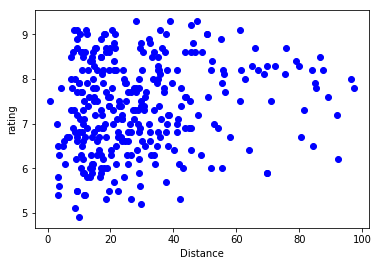

In [36]:
plt.scatter(ny_wifi_merged_reduced[ny_wifi_merged_reduced['distance_min']<100].distance_min, ny_wifi_merged_reduced[ny_wifi_merged_reduced['distance_min']<100]['venue.rating'],  color='blue')
plt.xlabel("Distance")
plt.ylabel("rating")
plt.show()

### From visual inspection, there appears to be no relationship between distance and rating. 

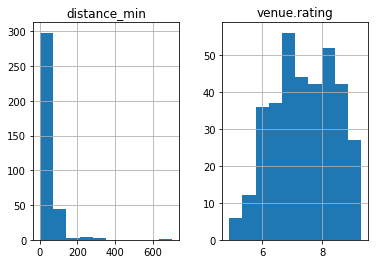

In [37]:
viz = ny_wifi_merged_reduced[['distance_min','venue.rating']]
viz.hist()
plt.show()

### We see that there is a distance outlier, so we will take wifi hotspot distances less than 100m from venues

In [38]:
ny_wifi_merged_reduced  = ny_wifi_merged_reduced[ny_wifi_merged_reduced['distance_min']<100]

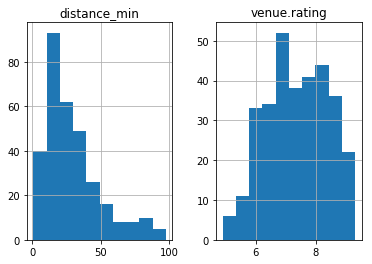

In [39]:
viz = ny_wifi_merged_reduced[['distance_min','venue.rating']]
viz.hist()
plt.show()

### Since there is no clear relationship between venue rating and distance from wiki hotspot, we will try clustering the venues to see if a pattern emerges on what types of restaurants, distances, and ratings

In [40]:
ny_wifi_merged_reduced_one_hot = pd.get_dummies(ny_wifi_merged_reduced[['Venue Category']], prefix="", prefix_sep="")

In [41]:
ny_wifi_merged_reduced_one_hot.head()

,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Add back in the Venue ID, Distance, Rating, and Category Columns

In [42]:
ny_wifi_merged_reduced_one_hot[['VenueId','distance_min','venue.rating','Venue Category']]=ny_wifi_merged_reduced[['VenueId','distance_min','venue.rating','Venue Category']]

In [43]:
ny_wifi_merged_reduced_one_hot.head()

,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,VenueId,distance_min,venue.rating,Venue Category
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4b1ff2eaf964a520372b24e3,21.761316,6.5,Sandwich Place
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45841feaf964a520973f1fe3,21.854922,6.1,Burger Joint
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4a80bbedf964a52011f61fe3,11.602321,7.1,Mexican Restaurant
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,554d791f498e4550edf2c13f,41.028637,7.0,Sports Bar
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5406665a498e800a29690993,37.729108,9.0,Pizza Place


In [44]:
# fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
fixed_columns = list(ny_wifi_merged_reduced_one_hot.columns[-4:])+list(ny_wifi_merged_reduced_one_hot.columns[:-4])
# fixed_columns
# fixed_columns
ny_wifi_merged_reduced_one_hot = ny_wifi_merged_reduced_one_hot[fixed_columns]
ny_wifi_merged_reduced_one_hot.head()

,VenueId,distance_min,venue.rating,Venue Category,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,4b1ff2eaf964a520372b24e3,21.761316,6.5,Sandwich Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45841feaf964a520973f1fe3,21.854922,6.1,Burger Joint,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4a80bbedf964a52011f61fe3,11.602321,7.1,Mexican Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,554d791f498e4550edf2c13f,41.028637,7.0,Sports Bar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5406665a498e800a29690993,37.729108,9.0,Pizza Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop the Category Venue Column

In [45]:
ny_wifi_merged_reduced_one_hot.drop(columns='Venue Category', inplace=True)

In [46]:
ny_wifi_merged_reduced_one_hot.head()

,VenueId,distance_min,venue.rating,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,4b1ff2eaf964a520372b24e3,21.761316,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45841feaf964a520973f1fe3,21.854922,6.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4a80bbedf964a52011f61fe3,11.602321,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,554d791f498e4550edf2c13f,41.028637,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5406665a498e800a29690993,37.729108,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
ny_wifi_merged_reduced_grouped_clustering = ny_wifi_merged_reduced_one_hot.drop('VenueId', 1)

In [48]:
ny_wifi_merged_reduced_grouped_clustering.head()

,distance_min,venue.rating,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,21.761316,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21.854922,6.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11.602321,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,41.028637,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,37.729108,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
ny_wifi_merged_reduced_grouped_clustering.shape

(317, 71)

# Cluster Analysis
We will run a cluster k means analysis

In [50]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_wifi_merged_reduced_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 3, 2, 2, 0, 3, 1, 1, 0], dtype=int32)

In [51]:
ny_wifi_merged_reduced_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
ny_wifi_merged_reduced_grouped_clustering.head()

,Cluster Labels,distance_min,venue.rating,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,1,21.761316,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,21.854922,6.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,11.602321,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,41.028637,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,37.729108,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
ny_wifi_merged_reduced_grouped_clustering['Cluster Labels'].value_counts()

3    116
1     90
2     65
0     29
4     17
Name: Cluster Labels, dtype: int64

In [53]:
ny_wifi_merged_reduced_grouped_clustering[['VenueId','Venue Category']] = ny_wifi_merged_reduced[['VenueId','Venue Category']]
ny_wifi_merged_reduced_grouped_clustering.head()

,Cluster Labels,distance_min,venue.rating,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bar,Bed & Breakfast,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,CafÃ©,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gay Bar,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Soup Place,South Indian Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,VenueId,Venue Category
0,1,21.761316,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4b1ff2eaf964a520372b24e3,Sandwich Place
1,1,21.854922,6.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45841feaf964a520973f1fe3,Burger Joint
2,3,11.602321,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4a80bbedf964a52011f61fe3,Mexican Restaurant
3,2,41.028637,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,554d791f498e4550edf2c13f,Sports Bar
4,2,37.729108,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5406665a498e800a29690993,Pizza Place


### Now we will drop all columns except for Venue ID, Distance, Rating, Category, and Cluster Labels

In [54]:
ny_wifi_merged_reduced_final = ny_wifi_merged_reduced_grouped_clustering[['VenueId','distance_min','venue.rating','Venue Category','Cluster Labels']]

In [55]:
ny_wifi_merged_reduced_final.head()

,VenueId,distance_min,venue.rating,Venue Category,Cluster Labels
0,4b1ff2eaf964a520372b24e3,21.761316,6.5,Sandwich Place,1
1,45841feaf964a520973f1fe3,21.854922,6.1,Burger Joint,1
2,4a80bbedf964a52011f61fe3,11.602321,7.1,Mexican Restaurant,3
3,554d791f498e4550edf2c13f,41.028637,7.0,Sports Bar,2
4,5406665a498e800a29690993,37.729108,9.0,Pizza Place,2


In [56]:
ny_wifi_merged_reduced_final['Cluster Labels'].value_counts()

3    116
1     90
2     65
0     29
4     17
Name: Cluster Labels, dtype: int64

### Now we will examine the clusters

In [57]:
ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==0]

,VenueId,distance_min,venue.rating,Venue Category,Cluster Labels
5,42f15a80f964a520bb261fe3,68.916880,8.1,Italian Restaurant,0
9,4a5e9b4af964a520e4be1fe3,71.051317,7.5,Coffee Shop,0
38,48c50c4bf964a520dc511fe3,65.079030,8.3,Japanese Restaurant,0
46,5424cfb0498e30269702ea2d,64.128917,6.4,Bar,0
53,5e150d9cc546ca0007bf6a9e,56.114391,8.1,Food Court,0
55,4ad67f80f964a5207e0721e3,50.690115,9.0,Japanese Restaurant,0
68,4a7c4ad3f964a52023ec1fe3,55.339380,7.9,Russian Restaurant,0
108,4d5b409222ad2d43527ce695,50.968851,7.6,Bar,0
121,4b19bf81f964a52050e323e3,66.022978,8.7,Pub,0
171,547f23a7498ed0e2ee4a59fc,52.904095,7.0,American Restaurant,0


In [62]:
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==0]['venue.rating'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==0]['distance_min'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==0]['Venue Category'].value_counts())

7.724137931034482
59.925001177241384
Bar                              4
Pizza Place                      3
Coffee Shop                      3
Vegetarian / Vegan Restaurant    2
Italian Restaurant               2
Japanese Restaurant              2
Sandwich Place                   2
Food Court                       1
Indian Restaurant                1
Dim Sum Restaurant               1
Pub                              1
Russian Restaurant               1
CafÃ©                            1
Restaurant                       1
American Restaurant              1
Seafood Restaurant               1
Sports Bar                       1
Mexican Restaurant               1
Name: Venue Category, dtype: int64


In [63]:
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==1]['venue.rating'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==1]['distance_min'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==1]['Venue Category'].value_counts())

7.275555555555558
24.507427978333336
Sandwich Place              6
Bar                         6
Pub                         5
Pizza Place                 5
American Restaurant         5
Coffee Shop                 5
New American Restaurant     4
Sports Bar                  3
Salad Place                 3
Italian Restaurant          3
Ramen Restaurant            2
Fast Food Restaurant        2
Japanese Restaurant         2
CafÃ©                       2
Thai Restaurant             2
Burger Joint                2
Korean Restaurant           2
Mexican Restaurant          2
Food Court                  1
Jewish Restaurant           1
Diner                       1
Steakhouse                  1
Tea Room                    1
Vietnamese Restaurant       1
Hotel Bar                   1
Irish Pub                   1
Lounge                      1
Spanish Restaurant          1
Food Truck                  1
Cuban Restaurant            1
Mediterranean Restaurant    1
French Restaurant           1
Fri

In [64]:
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==2]['venue.rating'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==2]['distance_min'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==2]['Venue Category'].value_counts())

7.549230769230769
39.05632044815383
Coffee Shop                      7
Pizza Place                      5
Sandwich Place                   5
Bar                              5
Japanese Restaurant              4
Indian Restaurant                4
Bagel Shop                       4
Steakhouse                       3
Chinese Restaurant               2
Mexican Restaurant               2
Thai Restaurant                  2
Sports Bar                       2
Ramen Restaurant                 2
Fried Chicken Joint              2
Greek Restaurant                 1
Caribbean Restaurant             1
Tapas Restaurant                 1
Seafood Restaurant               1
Diner                            1
American Restaurant              1
Restaurant                       1
Sushi Restaurant                 1
Italian Restaurant               1
Vegetarian / Vegan Restaurant    1
Salad Place                      1
Russian Restaurant               1
Cuban Restaurant                 1
Mediterranean Resta

In [65]:
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==3]['venue.rating'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==3]['distance_min'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==3]['Venue Category'].value_counts())

7.18448275862069
11.797680268336212
Coffee Shop                      13
Pizza Place                       9
Bar                               8
Mexican Restaurant                7
Pub                               7
American Restaurant               7
Burger Joint                      5
Diner                             4
Sandwich Place                    4
Sports Bar                        4
Seafood Restaurant                3
Italian Restaurant                3
Sushi Restaurant                  3
CafÃ©                             3
Vegetarian / Vegan Restaurant     2
Lounge                            2
Chinese Restaurant                2
Asian Restaurant                  2
Japanese Restaurant               2
Taco Place                        2
Latin American Restaurant         2
Bagel Shop                        2
French Restaurant                 2
Restaurant                        1
Comfort Food Restaurant           1
Korean Restaurant                 1
Hotel Bar                   

In [66]:
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==4]['venue.rating'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==4]['distance_min'].mean())
print(ny_wifi_merged_reduced_final[ny_wifi_merged_reduced_final['Cluster Labels']==4]['Venue Category'].value_counts())

7.729411764705881
85.43385327176469
Bar                          3
Breakfast Spot               2
Coffee Shop                  2
Mediterranean Restaurant     1
American Restaurant          1
African Restaurant           1
Pub                          1
Burger Joint                 1
Indian Restaurant            1
Tapas Restaurant             1
Greek Restaurant             1
Japanese Restaurant          1
Middle Eastern Restaurant    1
Name: Venue Category, dtype: int64


In [68]:
ny_wifi_merged_reduced_final[(ny_wifi_merged_reduced_final['Cluster Labels']==3) & (ny_wifi_merged_reduced_final['Venue Category']=='Pizza Place')]

,VenueId,distance_min,venue.rating,Venue Category,Cluster Labels
16,4b292c91f964a5204a9a24e3,17.268311,7.2,Pizza Place,3
47,49c8f409f964a52026581fe3,11.204779,6.2,Pizza Place,3
117,3fd66200f964a52057e71ee3,14.377605,6.1,Pizza Place,3
127,4a6e5c24f964a52092d41fe3,17.759246,6.9,Pizza Place,3
300,520d094711d2181a654c3559,5.247269,6.6,Pizza Place,3
317,522bbabb11d23cc6c6a5d12c,8.959197,6.2,Pizza Place,3
433,521412c4bce67af59ad455e4,10.091761,6.8,Pizza Place,3
1252,4bd4eeff29eb9c7497b092e1,13.587692,6.0,Pizza Place,3
1433,4a639f9ff964a52077c51fe3,12.457523,9.0,Pizza Place,3


In [69]:
ny_wifi_merged_reduced_final[(ny_wifi_merged_reduced_final['Cluster Labels']==0) & (ny_wifi_merged_reduced_final['Venue Category']=='Sandwich Place')]

,VenueId,distance_min,venue.rating,Venue Category,Cluster Labels
291,4b705429f964a52010132de3,54.230662,6.9,Sandwich Place,0
304,518455a0498e0b8ab38ed574,61.367795,8.2,Sandwich Place,0


In [70]:
ny_wifi_merged_reduced_final[(ny_wifi_merged_reduced_final['Cluster Labels']==1) & (ny_wifi_merged_reduced_final['Venue Category']=='Sandwich Place')]

,VenueId,distance_min,venue.rating,Venue Category,Cluster Labels
0,4b1ff2eaf964a520372b24e3,21.761316,6.5,Sandwich Place,1
19,4aa7b34cf964a520fe4c20e3,29.292732,6.9,Sandwich Place,1
67,53a21cb8498ec69e1a6207dc,23.808327,6.6,Sandwich Place,1
136,5afd8007f8cbd40039cc1f97,30.575062,7.4,Sandwich Place,1
309,4a81b0aff964a52046f71fe3,19.410961,5.5,Sandwich Place,1
445,4af8875bf964a5200c0e22e3,24.536137,7.9,Sandwich Place,1


In [78]:
grouped = ny_wifi_merged_reduced_final.groupby('Venue Category')['venue.rating'].mean().reset_index()
grouped.sort_values('venue.rating', ascending=False)
# .sort_values('venue.rating',ascending=False)

,Venue Category,venue.rating
24,Food Truck,9.300000
38,Karaoke Bar,9.100000
3,Australian Restaurant,8.800000
30,Hawaiian Restaurant,8.800000
64,Tapas Restaurant,8.750000
67,Vegetarian / Vegan Restaurant,8.700000
21,Falafel Restaurant,8.700000
65,Tea Room,8.600000
23,Food Court,8.550000
41,Lebanese Restaurant,8.400000


In [83]:
grouped_count = ny_wifi_merged_reduced_final.groupby('Venue Category')['Cluster Labels'].count().reset_index()
# grouped_count
grouped_count.sort_values('Cluster Labels', ascending=False)

,Venue Category,Cluster Labels
15,Coffee Shop,30
6,Bar,26
48,Pizza Place,22
54,Sandwich Place,17
1,American Restaurant,15
49,Pub,14
44,Mexican Restaurant,12
36,Japanese Restaurant,11
59,Sports Bar,10
35,Italian Restaurant,9


In [202]:
from project_lib import Project
project = Project(project_id='2697ba49-249a-4dd6-9bbc-52f9de328b9c', project_access_token='p-e6763f317a0fead02c8ec759a8b9013dbf341de3')
project.save_data(file_name = "ny_wifi_merged_reduced_final.csv",data = ny_wifi_merged_reduced_final.to_csv(index=False), overwrite=True)

{'file_name': 'ny_wifi_merged_reduced_final.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'courseracapstone-donotdelete-pr-xvzmisvfyotclq',
 'asset_id': 'ca76e83d-fffc-400a-8cbc-a1cbf975d7ec'}